
# Nested pie charts

The following examples show two ways to build a nested pie chart
in Matplotlib. Such charts are often referred to as donut charts.

See also the :doc:`/gallery/specialty_plots/leftventricle_bullseye` example.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

The most straightforward way to build a pie chart is to use the
`~matplotlib.axes.Axes.pie` method.

In this case, pie takes values corresponding to counts in a group.
We'll first generate some fake data, corresponding to three groups.
In the inner circle, we'll treat each number as belonging to its
own group. In the outer circle, we'll plot them as members of their
original 3 groups.

The effect of the donut shape is achieved by setting a ``width`` to
the pie's wedges through the *wedgeprops* argument.



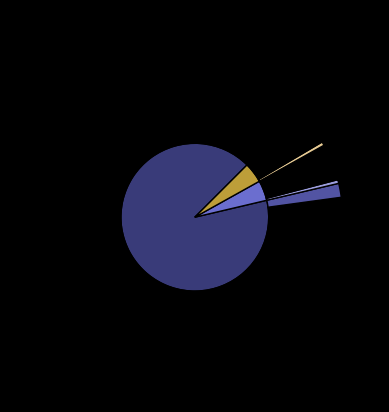

In [104]:
fig, ax = plt.subplots(facecolor='k')

size = 0.5

# Positive Negative
# superset 68787692., 3173681.
# mirror subset [1388898., 291735.],
# remainder [67398794., 2881946.]
vals = np.array([[ (67398794-2881946),(1388898-291735),],  # positive not in NEQ
                 [291735., 2881946., ],  # positive NEQ
                 [291735., 2881946., ]])  # negative

cmap = plt.color_sequences["tab20b"]
outer_colors = [cmap[i] for i in [0, 2, 9]]
inner_colors = ['k',cmap[1], cmap[3], 'k',cmap[11],  'k', ]

ax.pie(vals.sum(axis=1), radius=1-size, colors=outer_colors, startangle=45,
       wedgeprops=dict(width=size, edgecolor='k'), 
       textprops=dict(color='w')
       )

ax.pie(vals.flatten(), radius=1, colors=inner_colors, startangle=45,
       wedgeprops=dict(width=size, edgecolor='k'), )

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

However, you can accomplish the same output by using a bar plot on
Axes with a polar coordinate system. This may give more flexibility on
the exact design of the plot.

In this case, we need to map x-values of the bar chart onto radians of
a circle. The cumulative sum of the values are used as the edges
of the bars.



/tmp/ipykernel_25759/2116222195.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


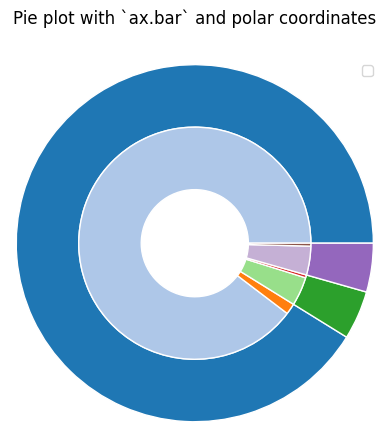

In [ ]:
fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))

size = 0.35
vals = np.array([[(67398794-2881946), (1388898-291735)], 
                  [2881946., 291735.],
                  [2881946., 291735.]])
# Normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
# Obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.colormaps["tab20"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='k', linewidth=1, align="edge")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='k', linewidth=1, align="edge")

ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
ax.legend()
plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.axes.Axes.pie` / `matplotlib.pyplot.pie`
   - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
   - `matplotlib.projections.polar`
   - ``Axes.set`` (`matplotlib.artist.Artist.set`)
   - `matplotlib.axes.Axes.set_axis_off`

.. tags::

   plot-type: pie
   level: beginner
   purpose: showcase

